## 

Using rotated to hz + OpenCv border

Basic default transforms

Using data with wrap instead of border_reflect_101 and imgaug to add classes

Note we dont use aug on irregular metal

valid + predicted unverified

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import geopandas as gpd
from resizeimage import resizeimage
import datetime
import uuid
from os import listdir
from os.path import isfile, join

In [3]:
torch.cuda.set_device(0)
torch.cuda.current_device()

0

In [4]:
data_dir = Path('data')

In [5]:
RETRAIN = True
RESIZE_IMAGES = True

In [6]:
MODEL_NAME='cv_reflect_imgaug'

In [7]:
NB_NUM='05_6'

In [8]:
DATE = datetime.datetime.today().strftime('%Y%m%d')
UID=str(uuid.uuid4())[:8]
print(f'UID: {UID}, DATE: {DATE}')                                                 

UID: dbaf2851, DATE: 20191110


In [9]:
#DATE ='20191028'
#UID='77dc216d'

In [10]:
SUB_NUM='17'

In [11]:
img_size=256

In [12]:
train_images=data_dir/f'train/rotated/clipped/reflect/{img_size}'
test_images=data_dir/f'test/rotated/clipped/reflect/{img_size}'

In [13]:
test_names = get_image_files(test_images)

In [14]:
assert len(test_names)==7325

In [15]:
df_all=pd.read_csv(data_dir/'df_train_all.csv')

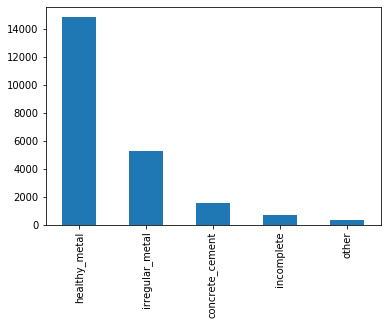

In [16]:
df_all['roof_material'].value_counts().plot(kind='bar')

In [17]:
df_v=df_all.loc[df_all['verified'] == True]

In [18]:
df_npu=pd.read_csv(data_dir/'non_predicted_unverfied.csv')

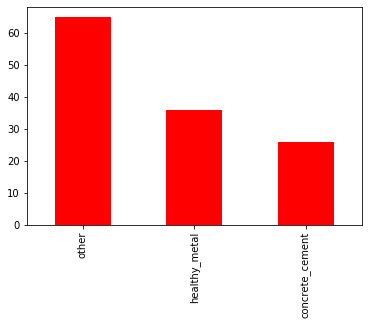

In [19]:
df_npu['roof_material'].value_counts().plot(kind='bar', color='red')

In [20]:
bad_ids=df_npu.id.values.tolist()

In [21]:
df_uv=df_all.loc[df_all['verified'] == False]

In [22]:
df_pred_v=df_uv.loc[~df_uv['id'].isin(bad_ids)]

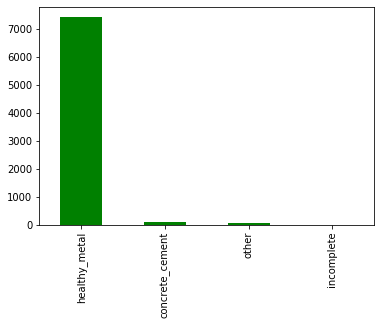

In [23]:
df_pred_v['roof_material'].value_counts().plot(kind='bar', color='green')

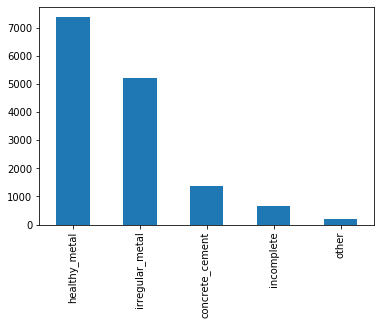

In [24]:
df_v['roof_material'].value_counts().plot(kind='bar')

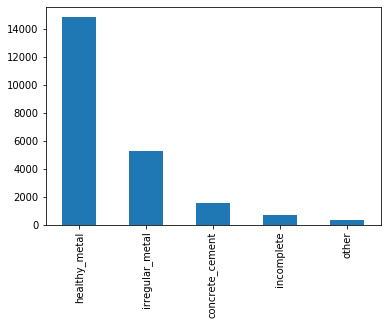

In [25]:
df_all['roof_material'].value_counts().plot(kind='bar')

In [26]:
df_aug=pd.read_csv(data_dir/'df_aug_reflect.csv')

In [27]:
len(df_aug)

171253

In [28]:
df_aug.tail()

,id,roof_material,verified,country,region
171248,7a214bda_imgaug_9_1005,concrete_cement,True,colombia,borde_rural
171249,7a2bfa30_imgaug_7_5683,healthy_metal,True,colombia,borde_soacha
171250,7a3dc152_imgaug_3_1483,healthy_metal,True,colombia,borde_rural
171251,7a3c9b10_imgaug_4_5386,healthy_metal,True,colombia,borde_soacha
171252,7a20854c_imgaug_7_14480,healthy_metal,True,st_lucia,dennery


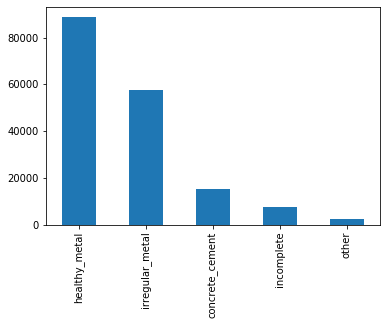

In [29]:
df_aug['roof_material'].value_counts().plot(kind='bar')

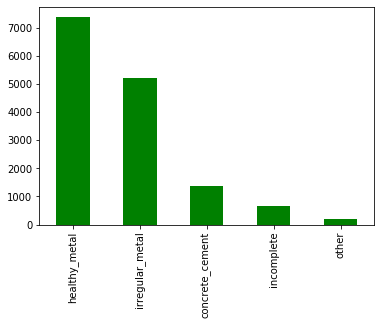

In [30]:
df_v['roof_material'].value_counts().plot(kind='bar', color='green')

In [31]:
df_img=df_aug[df_aug.id.str.contains('imgaug')]

In [32]:
len(df_img)

148700

In [33]:
df_irreg_aug=df_img.loc[df_img['roof_material'] == 'irregular_metal']

In [34]:
df_healthy_aug=df_img.loc[df_img['roof_material'] == 'healthy_metal']

In [35]:
df_concrete_aug=df_img.loc[df_img['roof_material'] == 'concrete_cement']

In [36]:
df_incomplete_aug=df_img.loc[df_img['roof_material'] == 'incomplete']

In [37]:
df_other_aug=df_img.loc[df_img['roof_material'] == 'other']

In [38]:
len(df_irreg_aug)

52410

In [39]:
len(df_healthy_aug)

73810

In [40]:
len(df_concrete_aug)

13870

In [41]:
len(df_incomplete_aug)

6680

In [42]:
len(df_other_aug)

1930

In [43]:
### append a fixed number eg 1000 images to each class

In [44]:
df_irreg_aug = df_irreg_aug.sample(n=1000)
assert len(df_irreg_aug)==1000
df_irreg_aug.head()

,id,roof_material,verified,country,region
46700,7a221880_imgaug_8_13991,irregular_metal,True,st_lucia,dennery
90499,7a2c4bde_imgaug_0_12917,irregular_metal,True,guatemala,mixco_1_and_ebenezer
152940,7a2a37e0_imgaug_4_6723,irregular_metal,True,colombia,borde_soacha
164205,7a35b35e_imgaug_1_11115,irregular_metal,True,guatemala,mixco_1_and_ebenezer
109816,7a35ffa8_imgaug_8_11066,irregular_metal,True,guatemala,mixco_1_and_ebenezer


In [45]:
df_healthy_aug = df_healthy_aug.sample(n=1000)
assert len(df_healthy_aug)==1000
df_healthy_aug.head()

,id,roof_material,verified,country,region
63597,7a2363e8_imgaug_4_283,healthy_metal,True,colombia,borde_rural
165576,7a4449a0_imgaug_0_5724,healthy_metal,True,colombia,borde_soacha
80311,7a2af054_imgaug_6_9893,healthy_metal,True,colombia,borde_soacha
89141,7a2b73c6_imgaug_5_14310,healthy_metal,True,st_lucia,dennery
85731,7a3be0bc_imgaug_4_12673,healthy_metal,True,guatemala,mixco_1_and_ebenezer


In [46]:
df_concrete_aug=df_concrete_aug.sample(n=1000)
assert len(df_concrete_aug)==1000
df_concrete_aug.head()

,id,roof_material,verified,country,region
34625,7a1f9362_imgaug_2_2720,concrete_cement,True,colombia,borde_rural
169672,7a3eaa0e_imgaug_6_10475,concrete_cement,True,guatemala,mixco_1_and_ebenezer
141541,7a32b686_imgaug_4_2104,concrete_cement,True,colombia,borde_rural
34458,7a2f80ba_imgaug_2_10811,concrete_cement,True,guatemala,mixco_1_and_ebenezer
60932,7a3dc080_imgaug_0_12639,concrete_cement,True,guatemala,mixco_1_and_ebenezer


In [47]:
df_incomplete_aug=df_incomplete_aug.sample(n=1000)
assert len(df_incomplete_aug)==1000
df_incomplete_aug.head()

,id,roof_material,verified,country,region
71215,7a2b5d5a_imgaug_2_10149,incomplete,True,colombia,borde_soacha
56614,7a3b9f3a_imgaug_7_4184,incomplete,True,colombia,borde_rural
102273,7a1dc47e_imgaug_0_1072,incomplete,True,colombia,borde_rural
154452,7a3315a4_imgaug_3_4892,incomplete,True,colombia,borde_soacha
170628,7a41dea4_imgaug_4_3980,incomplete,True,colombia,borde_rural


In [48]:
df_v.head()

,id,roof_material,verified,country,region
0,7a3f2a10,concrete_cement,True,colombia,borde_rural
1,7a1f731e,irregular_metal,True,colombia,borde_rural
2,7a424ad8,healthy_metal,True,colombia,borde_rural
3,7a3edc5e,healthy_metal,True,colombia,borde_rural
4,7a303a6e,healthy_metal,True,colombia,borde_rural


In [49]:
df_other_aug=df_other_aug.sample(n=1000)
assert len(df_other_aug)==1000
df_other_aug.head()

,id,roof_material,verified,country,region
133005,7a29181a_imgaug_9_12293,other,True,guatemala,mixco_1_and_ebenezer
157425,7a353e24_imgaug_3_11792,other,True,guatemala,mixco_1_and_ebenezer
66421,7a20b13e_imgaug_0_12275,other,True,guatemala,mixco_1_and_ebenezer
168255,7a1dc41a_imgaug_2_2132,other,True,colombia,borde_rural
163650,7a349168_imgaug_4_11349,other,True,guatemala,mixco_1_and_ebenezer


#### concat

In [50]:
len(df_v)

14870

In [51]:
frames = [df_irreg_aug, df_healthy_aug, df_concrete_aug, df_incomplete_aug, df_other_aug]

In [52]:
df_all_aug = pd.concat(frames)

In [53]:
assert len(df_all_aug)==5000

In [54]:
df_all_aug = df_v.append(df_all_aug, ignore_index=True)

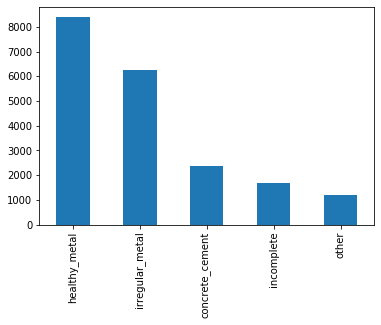

In [55]:
df_all_aug['roof_material'].value_counts().plot(kind='bar')

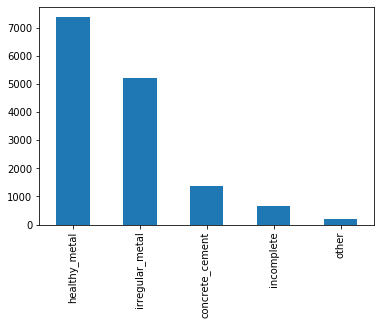

In [56]:
df_v['roof_material'].value_counts().plot(kind='bar')

In [57]:
#### add predicted unverified

In [58]:
df_all_aug = df_all_aug.append(df_pred_v, ignore_index=True)

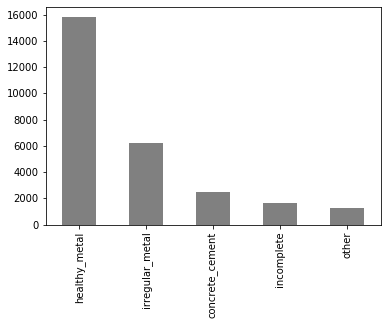

In [59]:
df_all_aug['roof_material'].value_counts().plot(kind='bar', color='gray')

#### test data

In [60]:
df_test=pd.read_csv(data_dir/'df_test_all.csv')

In [61]:
df_test.tail()

,id,country,region
7320,7a4f3ff4,st_lucia,dennery
7321,7a4fc578,st_lucia,dennery
7322,7a4ac7b2,st_lucia,dennery
7323,7a47e25e,st_lucia,dennery
7324,7a4e3f78,st_lucia,dennery


In [62]:
assert len(df_test)==7325

In [63]:
df_all_aug.loc[df_all_aug['id'] == '7a204ec4']

,id,roof_material,verified,country,region
12960,7a204ec4,irregular_metal,True,guatemala,mixco_1_and_ebenezer


In [64]:
len(df_all_aug)

27426

To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageList` (and not `ImageDataBunch`). This will make sure the model created has the proper loss function to deal with the multiple classes.

In [65]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

### setup dataset

In [66]:
np.random.seed(42)
dep_var='roof_material'
src = (ImageList.from_df(path=train_images, df=df_all_aug, cols='id', suffix='.tif')
       .split_by_rand_pct(0.2)
      .label_from_df(cols=dep_var)
      .add_test_folder(test_images))

In [67]:
data = (src.transform(tfms, size=img_size)
        .databunch().normalize(imagenet_stats))

In [68]:
#to check what params object has
#dir(data)

In [69]:
data.label_list

LabelLists;

Train: LabelList (21941 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,irregular_metal,healthy_metal,healthy_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Valid: LabelList (5485 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
healthy_metal,irregular_metal,concrete_cement,healthy_metal,irregular_metal
Path: data/train/rotated/clipped/reflect/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/reflect/256

In [70]:
data.loss_func

FlattenedLoss of CrossEntropyLoss()

`show_batch` still works, and show us the different labels separated by `;`.

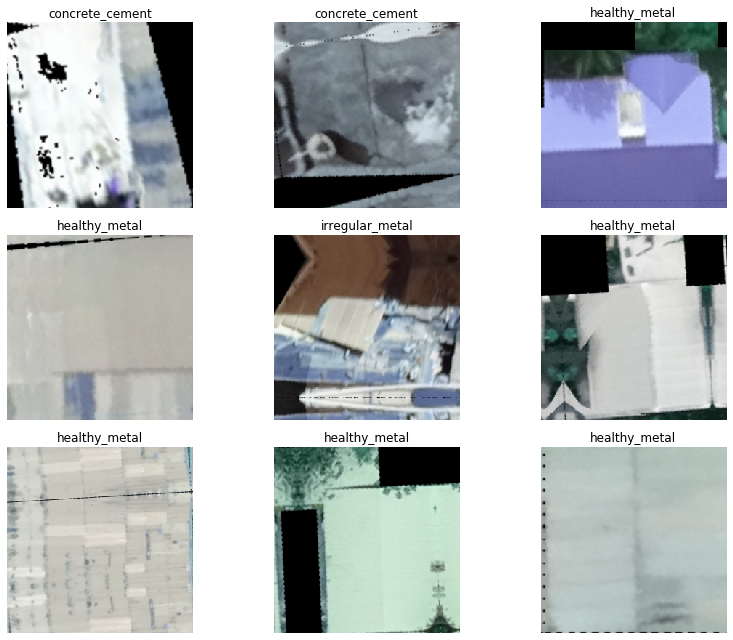

In [71]:
data.show_batch(rows=3, figsize=(12,9))

### Model

In [72]:
arch = models.resnet50
arch_name = 'rn50'

In [73]:
learn = cnn_learner(data, arch, metrics=error_rate, bn_final=True).to_fp16()

### Train model

In [74]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


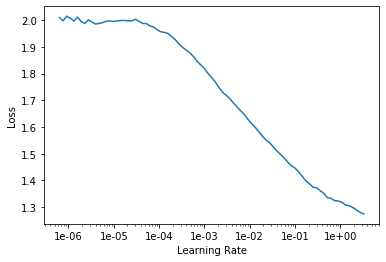

In [75]:
learn.recorder.plot()

Then we can fit the head of our network.

In [76]:
lr = 1e-2

In [77]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.712851,0.565356,0.187056,01:24
1,0.506678,0.464840,0.176481,01:19
2,0.463735,0.430806,0.169736,01:11
3,0.400770,0.383854,0.144394,01:14
4,0.382297,0.379990,0.142206,01:11


In [78]:
learn.save(f'stage-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

#### Load model

In [79]:
learn.load(f'stage-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (21941 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,irregular_metal,healthy_metal,healthy_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Valid: LabelList (5485 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
healthy_metal,irregular_metal,concrete_cement,healthy_metal,irregular_metal
Path: data/train/rotated/clipped/reflect/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/reflect/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilatio

In [80]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('irregular_metal', 'healthy_metal', 273),
 ('healthy_metal', 'irregular_metal', 121),
 ('incomplete', 'irregular_metal', 103),
 ('concrete_cement', 'healthy_metal', 54),
 ('incomplete', 'concrete_cement', 41),
 ('other', 'healthy_metal', 33),
 ('healthy_metal', 'concrete_cement', 28),
 ('incomplete', 'healthy_metal', 27),
 ('irregular_metal', 'incomplete', 22),
 ('other', 'irregular_metal', 16),
 ('concrete_cement', 'irregular_metal', 14),
 ('healthy_metal', 'other', 14),
 ('irregular_metal', 'concrete_cement', 13),
 ('concrete_cement', 'incomplete', 7),
 ('healthy_metal', 'incomplete', 7),
 ('other', 'concrete_cement', 5)]

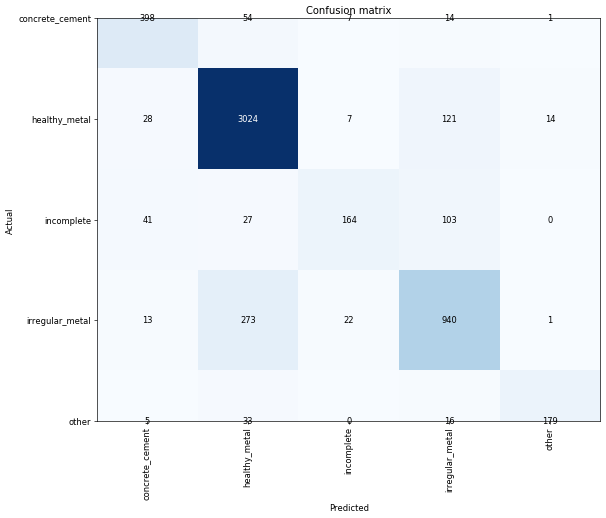

In [81]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

### Re-train

In [82]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


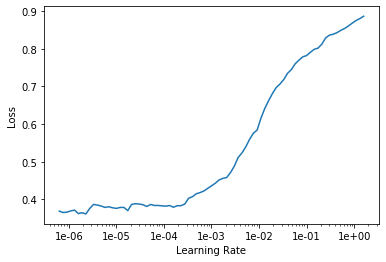

In [83]:
learn.lr_find()
learn.recorder.plot()

In [84]:
learn.fit_one_cycle(5, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.411450,0.379298,0.143118,01:47
1,0.383190,0.367902,0.142024,01:46
2,0.327580,0.347963,0.130356,01:49
3,0.285736,0.325206,0.121604,01:53
4,0.257935,0.320515,0.119599,02:14


In [85]:
learn.save(f'stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

In [90]:
learn.load(f'stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (21941 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,irregular_metal,healthy_metal,healthy_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Valid: LabelList (5485 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
healthy_metal,irregular_metal,concrete_cement,healthy_metal,irregular_metal
Path: data/train/rotated/clipped/reflect/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/reflect/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilatio

In [91]:
learn.fit_one_cycle(5, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.260303,0.341357,0.126527,02:03
1,0.291511,0.335999,0.126345,02:04
2,0.259632,0.321617,0.122151,01:50
3,0.190422,0.299595,0.110119,01:47
4,0.174454,0.300714,0.109389,01:46


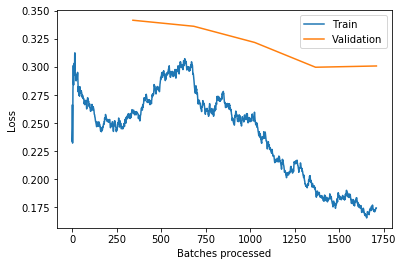

In [92]:
learn.recorder.plot_losses()

In [93]:
learn.save(f'stage-2_1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

### fp32

In [94]:
learn.load(f'stage-2_1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (21941 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,irregular_metal,healthy_metal,healthy_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Valid: LabelList (5485 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
healthy_metal,irregular_metal,concrete_cement,healthy_metal,irregular_metal
Path: data/train/rotated/clipped/reflect/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/reflect/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilatio

In [95]:
learn = learn.to_fp32()

In [96]:
learn.export(f'stage-2_1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.pkl')

In [97]:
learn.export()

### inference

In [98]:
#test_images=data_dir/f'test/rotated/clipped/{img_size}'
test_dataset=ImageList.from_folder(test_images)

In [99]:
len(test_dataset)

7325

In [104]:
learn = load_learner(path=data_dir/f'train/rotated/clipped/reflect/{img_size}', test=test_dataset)

In [105]:
learn.data.loss_func

FlattenedLoss of CrossEntropyLoss()

In [106]:
type(learn.data)

fastai.vision.data.ImageDataBunch

In [107]:
type(learn.dl(DatasetType.Test))

fastai.basic_data.DeviceDataLoader

In [108]:
len(learn.dl(DatasetType.Test))

115

Get number of items in the Valid dataset (in DeviceDataLoader)

In [109]:
#assert len(learn.dl(DatasetType.Test).dl)==7325

Required format:
    
<pre>
id	concrete_cement	healthy_metal	incomplete	irregular_metal	other
7a4d630a	0.9	0	0	0	0
7a4bbbd6	0.9	0	0	0	0
7a4ac744	0.9	0	0	0	0
7a4881fa	0.9	0	0	0	0
7a4aa4a8	0.9	0	0	0	0
</pre>


In [110]:
preds,y= learn.get_preds(ds_type=DatasetType.Test)

In [111]:
labels = np.argmax(preds, 1)

In [112]:
len(preds)

7325

In [113]:
preds[0].tolist()

[0.009772867895662785,
 0.988596498966217,
 0.0005484218127094209,
 0.0005262459744699299,
 0.0005559707060456276]

In [114]:
preds_list=[]
for pred in preds:
    preds_list.append(pred.tolist())

In [115]:
len(labels)

7325

In [116]:
learn.data.classes

['concrete_cement', 'healthy_metal', 'incomplete', 'irregular_metal', 'other']

In [117]:
data.classes

['concrete_cement', 'healthy_metal', 'incomplete', 'irregular_metal', 'other']

In [118]:
test_predictions = [learn.data.classes[int(x)] for x in labels]

In [119]:
test_predictions[0]

'healthy_metal'

In [120]:
type(learn.data.test_ds)

fastai.data_block.LabelList

In [121]:
 learn.data.test_ds.x.items

array([PosixPath('data/test/rotated/clipped/reflect/256/7a4d9168.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a4ae922.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a48ca98.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a49c614.tif'), ...,
       PosixPath('data/test/rotated/clipped/reflect/256/7a486800.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a4c49fc.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a501f50.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a4d27b4.tif')], dtype=object)

In [122]:
ids=[]
for item in learn.data.test_ds.x.items:
    base, id = os.path.split(item)
    id = id.split('.tif')[0]
    ids.append(id)

In [123]:
preds_list[0]

[0.009772867895662785,
 0.988596498966217,
 0.0005484218127094209,
 0.0005262459744699299,
 0.0005559707060456276]

In [124]:
cols = learn.data.classes.copy()
cols.insert(0,'id')
df = pd.DataFrame(list(zip(ids, preds_list)), 
               columns =['id', 'pred']) 

In [125]:
cols

['id',
 'concrete_cement',
 'healthy_metal',
 'incomplete',
 'irregular_metal',
 'other']

In [126]:
df.head()

,id,pred
0,7a4d9168,"[0.009772867895662785, 0.988596498966217, 0.00..."
1,7a4ae922,"[0.0010870289988815784, 0.9866624474525452, 0...."
2,7a48ca98,"[0.002392478520050645, 0.22535312175750732, 0...."
3,7a49c614,"[0.0007905348902568221, 0.9753568172454834, 0...."
4,7a4dd4f2,"[0.00046309552271850407, 0.9671767354011536, 0..."


In [127]:
pred_df = pd.DataFrame(df['pred'].values.tolist())

In [128]:
pred_df.insert(loc=0, column='id', value=ids)

In [129]:
pred_df.columns = cols

In [130]:
pred_df.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d9168,0.009773,0.988596,0.000548,0.000526,0.000556
1,7a4ae922,0.001087,0.986662,0.000228,0.011893,0.000129
2,7a48ca98,0.002392,0.225353,0.022957,0.747425,0.001873
3,7a49c614,0.000791,0.975357,0.000984,0.022245,0.000623
4,7a4dd4f2,0.000463,0.967177,0.000873,0.028267,0.003220


Required format:
    
<pre>
id	concrete_cement	healthy_metal	incomplete	irregular_metal	other
7a4d630a	0.9	0	0	0	0
7a4bbbd6	0.9	0	0	0	0
7a4ac744	0.9	0	0	0	0
7a4881fa	0.9	0	0	0	0
7a4aa4a8	0.9	0	0	0	0
</pre>


In [131]:
pred_ids=pred_df['id'].values.tolist()

In [132]:
df_baseline = pd.read_csv(data_dir/f'submissions/mean_baseline.csv')

In [133]:
df_baseline.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d630a,0.093275,0.496369,0.044923,0.352455,0.012979
1,7a4bbbd6,0.093275,0.496369,0.044923,0.352455,0.012979
2,7a4ac744,0.093275,0.496369,0.044923,0.352455,0.012979
3,7a4881fa,0.093275,0.496369,0.044923,0.352455,0.012979
4,7a4aa4a8,0.093275,0.496369,0.044923,0.352455,0.012979


In [134]:
baseline_ids=df_baseline['id'].values.tolist()

In [135]:
baseline_ids

['7a4d630a',
 '7a4bbbd6',
 '7a4ac744',
 '7a4881fa',
 '7a4aa4a8',
 '7a514434',
 '7a485f72',
 '7a4b8d32',
 '7a47eb3c',
 '7a4be3ae',
 '7a46a330',
 '7a481620',
 '7a49c678',
 '7a4ea044',
 '7a47aa1e',
 '7a51aa1e',
 '7a498be0',
 '7a4a2848',
 '7a4c4cd6',
 '7a465038',
 '7a4e94aa',
 '7a49f62a',
 '7a45b6f0',
 '7a50bb90',
 '7a4d38e4',
 '7a48a3a6',
 '7a4ebe9e',
 '7a48352e',
 '7a4bfaec',
 '7a51e060',
 '7a4c0f5a',
 '7a4b9976',
 '7a4b27d4',
 '7a51c698',
 '7a474bb4',
 '7a480054',
 '7a4a4044',
 '7a4c35ca',
 '7a4d3fd8',
 '7a4c1a68',
 '7a4eb1c4',
 '7a4a51ce',
 '7a4a14fc',
 '7a5015d2',
 '7a4ba95c',
 '7a5101ae',
 '7a4d0a22',
 '7a5134ee',
 '7a4a85c2',
 '7a514b14',
 '7a4d0a90',
 '7a485fd6',
 '7a4f668c',
 '7a44e752',
 '7a5162d4',
 '7a465894',
 '7a4c9a10',
 '7a485810',
 '7a4a9788',
 '7a503198',
 '7a4e206a',
 '7a4c15ea',
 '7a4f8536',
 '7a513df4',
 '7a4d7624',
 '7a4c9e8e',
 '7a4b2554',
 '7a502b12',
 '7a4c32e6',
 '7a4a8a2c',
 '7a467b76',
 '7a51b554',
 '7a4622e8',
 '7a4a599e',
 '7a4d17c4',
 '7a4fb740',
 '7a4ceed4',

In [136]:
assert set(pred_ids)==set(baseline_ids)

#### sort by baseline ids

In [137]:
pred_df['id_cat'] = pd.Categorical(
    pred_df['id'], 
    categories=baseline_ids, 
    ordered=True
)

In [138]:
pred_df.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other,id_cat
0,7a4d9168,0.009773,0.988596,0.000548,0.000526,0.000556,7a4d9168
1,7a4ae922,0.001087,0.986662,0.000228,0.011893,0.000129,7a4ae922
2,7a48ca98,0.002392,0.225353,0.022957,0.747425,0.001873,7a48ca98
3,7a49c614,0.000791,0.975357,0.000984,0.022245,0.000623,7a49c614
4,7a4dd4f2,0.000463,0.967177,0.000873,0.028267,0.003220,7a4dd4f2


In [139]:
pred_df=pred_df.sort_values('id_cat')

In [140]:
pred_df.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other,id_cat
716,7a4d630a,0.002565,0.977879,0.003695,0.014461,0.001400,7a4d630a
764,7a4bbbd6,0.000488,0.989842,0.000594,0.008172,0.000904,7a4bbbd6
1841,7a4ac744,0.002789,0.064884,0.004274,0.927339,0.000713,7a4ac744
3363,7a4881fa,0.001195,0.008399,0.001224,0.988718,0.000465,7a4881fa
133,7a4aa4a8,0.004565,0.957510,0.003574,0.033118,0.001234,7a4aa4a8


In [141]:
pred_df.drop(columns=['id_cat'],inplace=True)

In [142]:
assert (len(pred_df))==7325

In [143]:
pred_df.to_csv(data_dir/f'submissions/stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.csv', index=False)

In [ ]:
### 